In [1]:
# Load Data
from scipy.io import arff
import pandas as pd
import numpy as np

data_files = [
    "dataset/Scenario/Scenario B/TimeBasedFeatures-Dataset-15s-AllinOne.arff"
]
iscx_tbf = None

for data_file in data_files:
    print(f"{data_file}")
    with open(data_file, "r") as f:
      data, meta = arff.loadarff(f)
      ndf = pd.DataFrame(data=data, columns=meta.names())
      if iscx_tbf is None:
        iscx_tbf = ndf
      else:
        iscx_tbf = pd.concat([iscx_tbf, ndf])
    
# fix a loadarff limitation with strings
iscx_tbf["class1"] = iscx_tbf["class1"].map(lambda x: x.decode("utf-8"))

iscx_tbf.head(5)

dataset/Scenario/Scenario B/TimeBasedFeatures-Dataset-15s-AllinOne.arff


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,CHAT
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,CHAT
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,CHAT
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,CHAT
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,CHAT


In [2]:
iscx_tbf.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,...,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04
mean,9.791705e+06,6.086783e+05,6.267802e+05,3.314204e+06,2.861716e+06,1.003929e+06,9.218250e+05,8.448286e+05,6.133578e+05,2073.780095,...,4.768167e+05,1.035025e+06,3.253846e+06,3.635654e+06,4.091204e+06,5.025001e+05,2.983753e+06,3.325142e+06,3.732466e+06,4.531389e+05
std,1.438458e+07,2.243195e+06,2.326442e+06,1.062115e+07,9.652561e+06,3.141855e+06,2.495984e+06,4.336559e+06,2.516395e+06,19115.713624,...,1.404428e+06,3.534085e+06,1.342955e+07,1.356162e+07,1.400211e+07,2.813959e+06,1.334323e+07,1.347430e+07,1.390155e+07,2.785573e+06
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,3.346690e+05,7.000000e+00,2.000000e+00,2.597050e+04,2.454225e+04,1.154333e+04,5.626786e+03,1.145469e+02,0.000000e+00,2.599190,...,9.577449e+03,5.574602e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,1.109263e+07,6.200000e+01,2.100000e+01,2.821430e+05,2.865800e+05,5.104959e+04,3.526250e+04,1.164916e+04,9.605910e+03,11.681220,...,8.412602e+04,7.518175e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,1.494537e+07,1.645000e+03,1.651000e+03,4.289454e+06,4.265465e+06,5.260302e+05,4.843726e+05,6.055940e+05,5.340370e+05,100.671695,...,3.119330e+05,7.659213e+05,2.767727e+06,4.248512e+06,5.690602e+06,0.000000e+00,1.943930e+06,3.333185e+06,4.696002e+06,0.000000e+00
max,6.014050e+08,3.768079e+07,4.300238e+07,3.035957e+08,6.001097e+08,1.520000e+08,4.300000e+07,2.150000e+08,9.800000e+07,1000000.000000,...,6.070000e+07,1.360000e+08,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08


In [3]:
iscx_tbf["class1"].value_counts()

VOIP         5097
BROWSING     5000
FT           2950
CHAT         2086
P2P          1928
STREAMING     957
MAIL          740
Name: class1, dtype: int64

In [4]:
iscx_values = iscx_tbf.copy()
del iscx_values["class1"]

In [5]:
int(iscx_values.columns.shape[0] / 3)

7

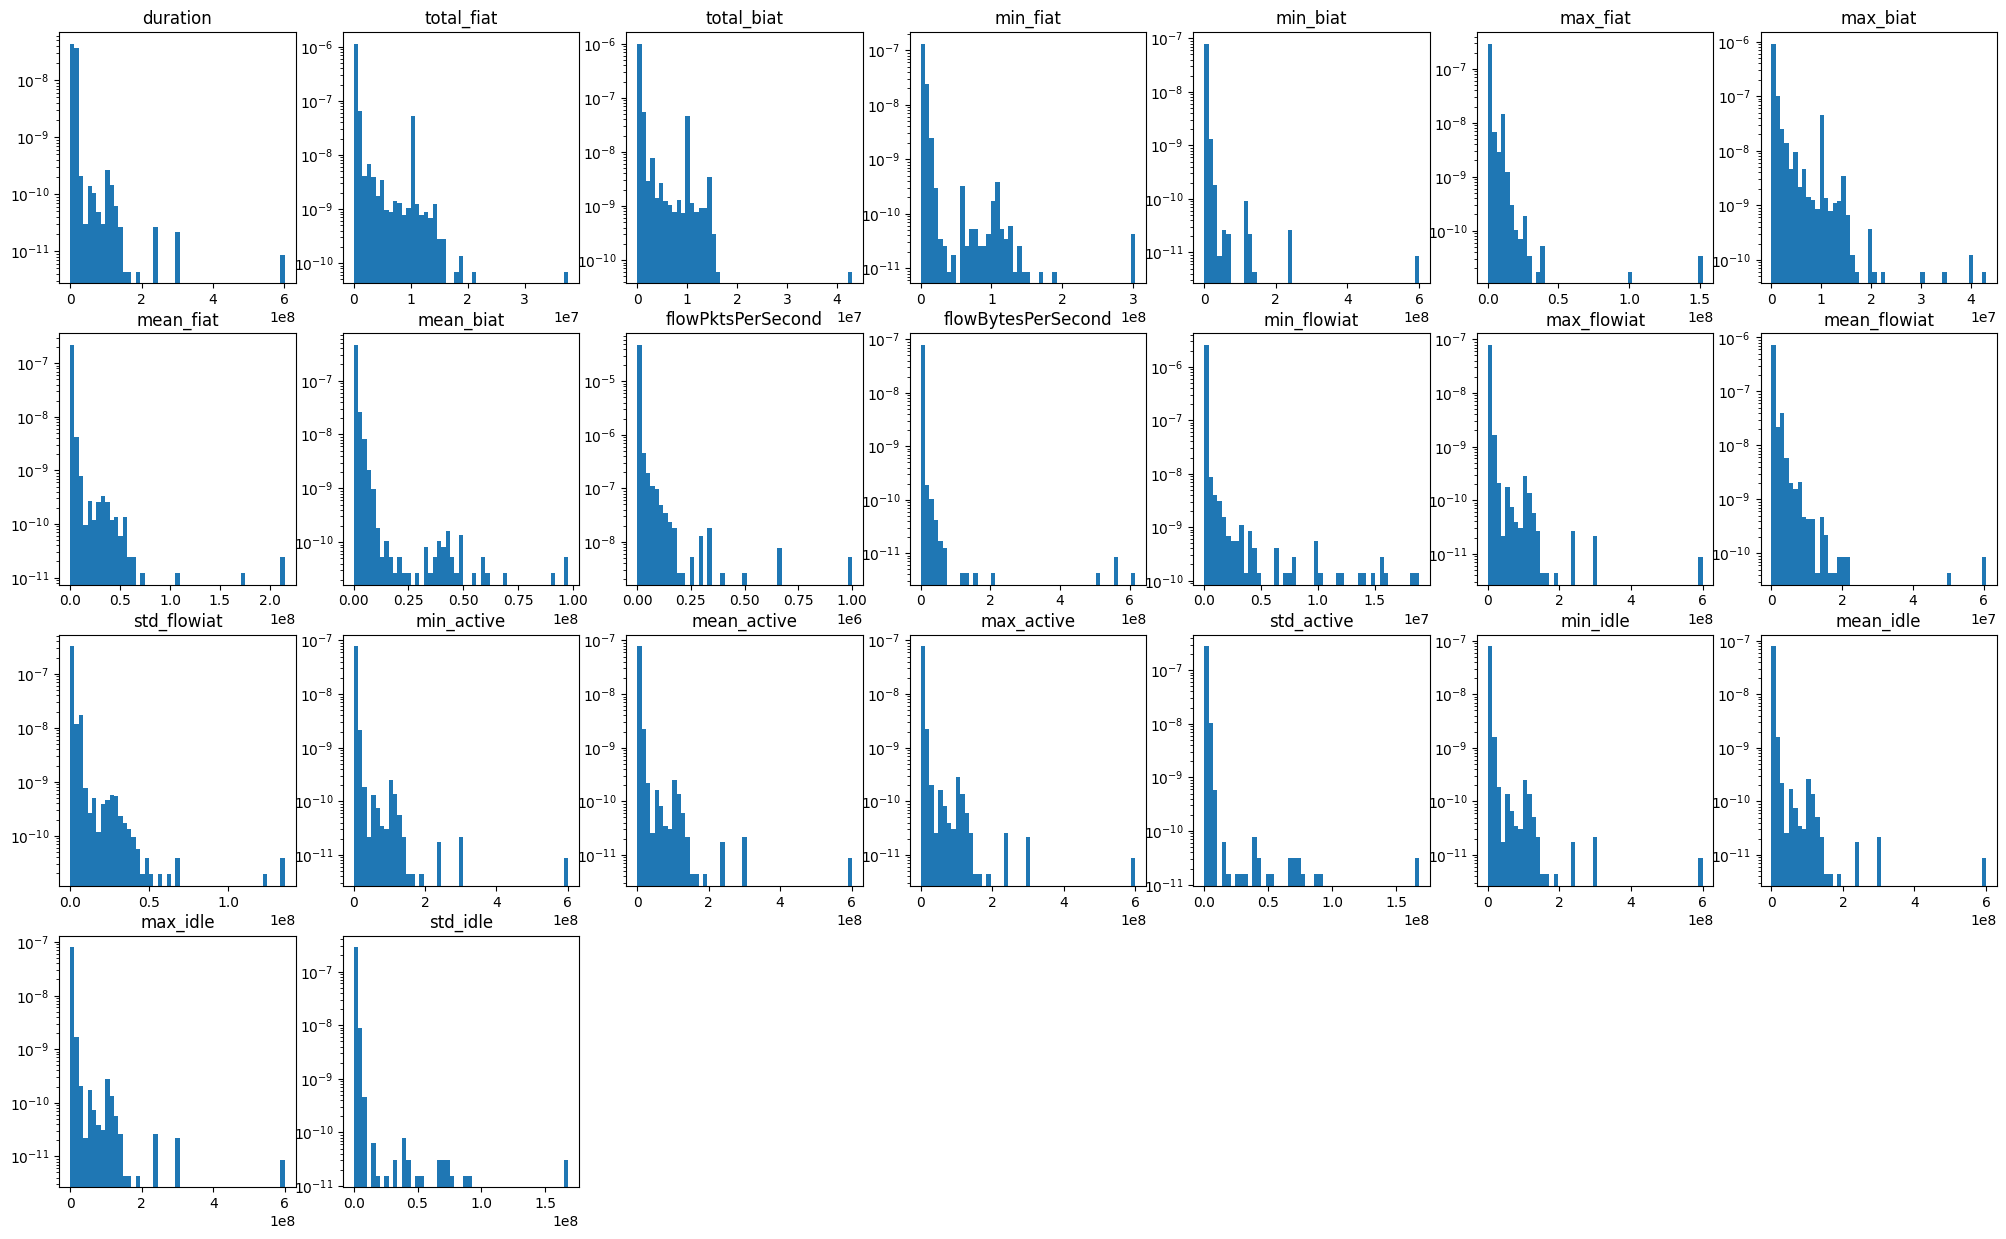

In [6]:
import matplotlib.pyplot as plt

def visualize_space(pd):
    fig = plt.figure(figsize=(25,15))
    plots = int(pd.columns.shape[0] / 3)

    for i, col in enumerate(pd):
        column = pd[col].values
        bins = np.linspace(column.min(), column.max(), 50)
        ax = fig.add_subplot(4, plots, i + 1)
        ax.hist(column, bins, density=True, log=True)
        ax.set_title(col)
    
visualize_space(iscx_values)

In [7]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

iscx_features_df = pd.DataFrame()

for col in iscx_values.columns:
    col_data = iscx_values[col].values[:, None]
    transformed = RobustScaler().fit_transform(col_data)
    iscx_features_df[col] = transformed.squeeze()

iscx_features_df.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,18758.000000,18758.000000,18758.000000,18758.000000,18758.000000,1.875800e+04,18758.000000,18758.000000,1.875800e+04,18758.000000,...,1.875800e+04,1.875800e+04,18758.000000,18758.000000,18758.000000,1.875800e+04,18758.000000,18758.000000,18758.000000,1.875800e+04
mean,-0.089039,371.560616,380.084394,0.711170,0.607211,1.852097e+00,1.851844,1.376066,1.130543e+00,21.026269,...,1.298772e+00,1.262376e+00,1.175638,0.855748,0.718940,5.025001e+05,1.534907,0.997587,0.794818,4.531389e+05
std,0.984524,1369.472121,1410.819862,2.491190,2.276052,6.106775e+00,5.213590,7.162190,4.712023e+00,194.914095,...,4.644955e+00,4.647992e+00,4.852193,3.192087,2.460567,2.813959e+06,6.864045,4.042471,2.960294,2.785573e+06
min,-0.759212,-0.038462,-0.013341,-0.066177,-0.067575,-9.922430e-02,-0.073656,-0.019240,-1.798735e-02,-0.119108,...,-2.782354e-01,-9.887825e-02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,-0.736307,-0.033578,-0.011522,-0.060085,-0.061788,-7.678771e-02,-0.061903,-0.019050,-1.798735e-02,-0.092605,...,-2.465593e-01,-9.154659e-02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,7.074419e-18,0.000000,0.000000,-1.704230e-18,0.000000,...,-2.406421e-17,9.568084e-18,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
75%,0.263693,0.966422,0.988478,0.939915,0.938212,9.232123e-01,0.938097,0.980950,9.820127e-01,0.907395,...,7.534407e-01,9.084534e-01,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00
max,40.402735,23004.105617,26077.838690,71.142194,141.436920,2.953408e+02,89.744366,355.071257,1.834899e+02,10196.418603,...,2.004788e+02,1.787669e+02,217.291948,141.461276,105.683862,1.680000e+08,308.709339,180.008009,127.791576,1.680000e+08


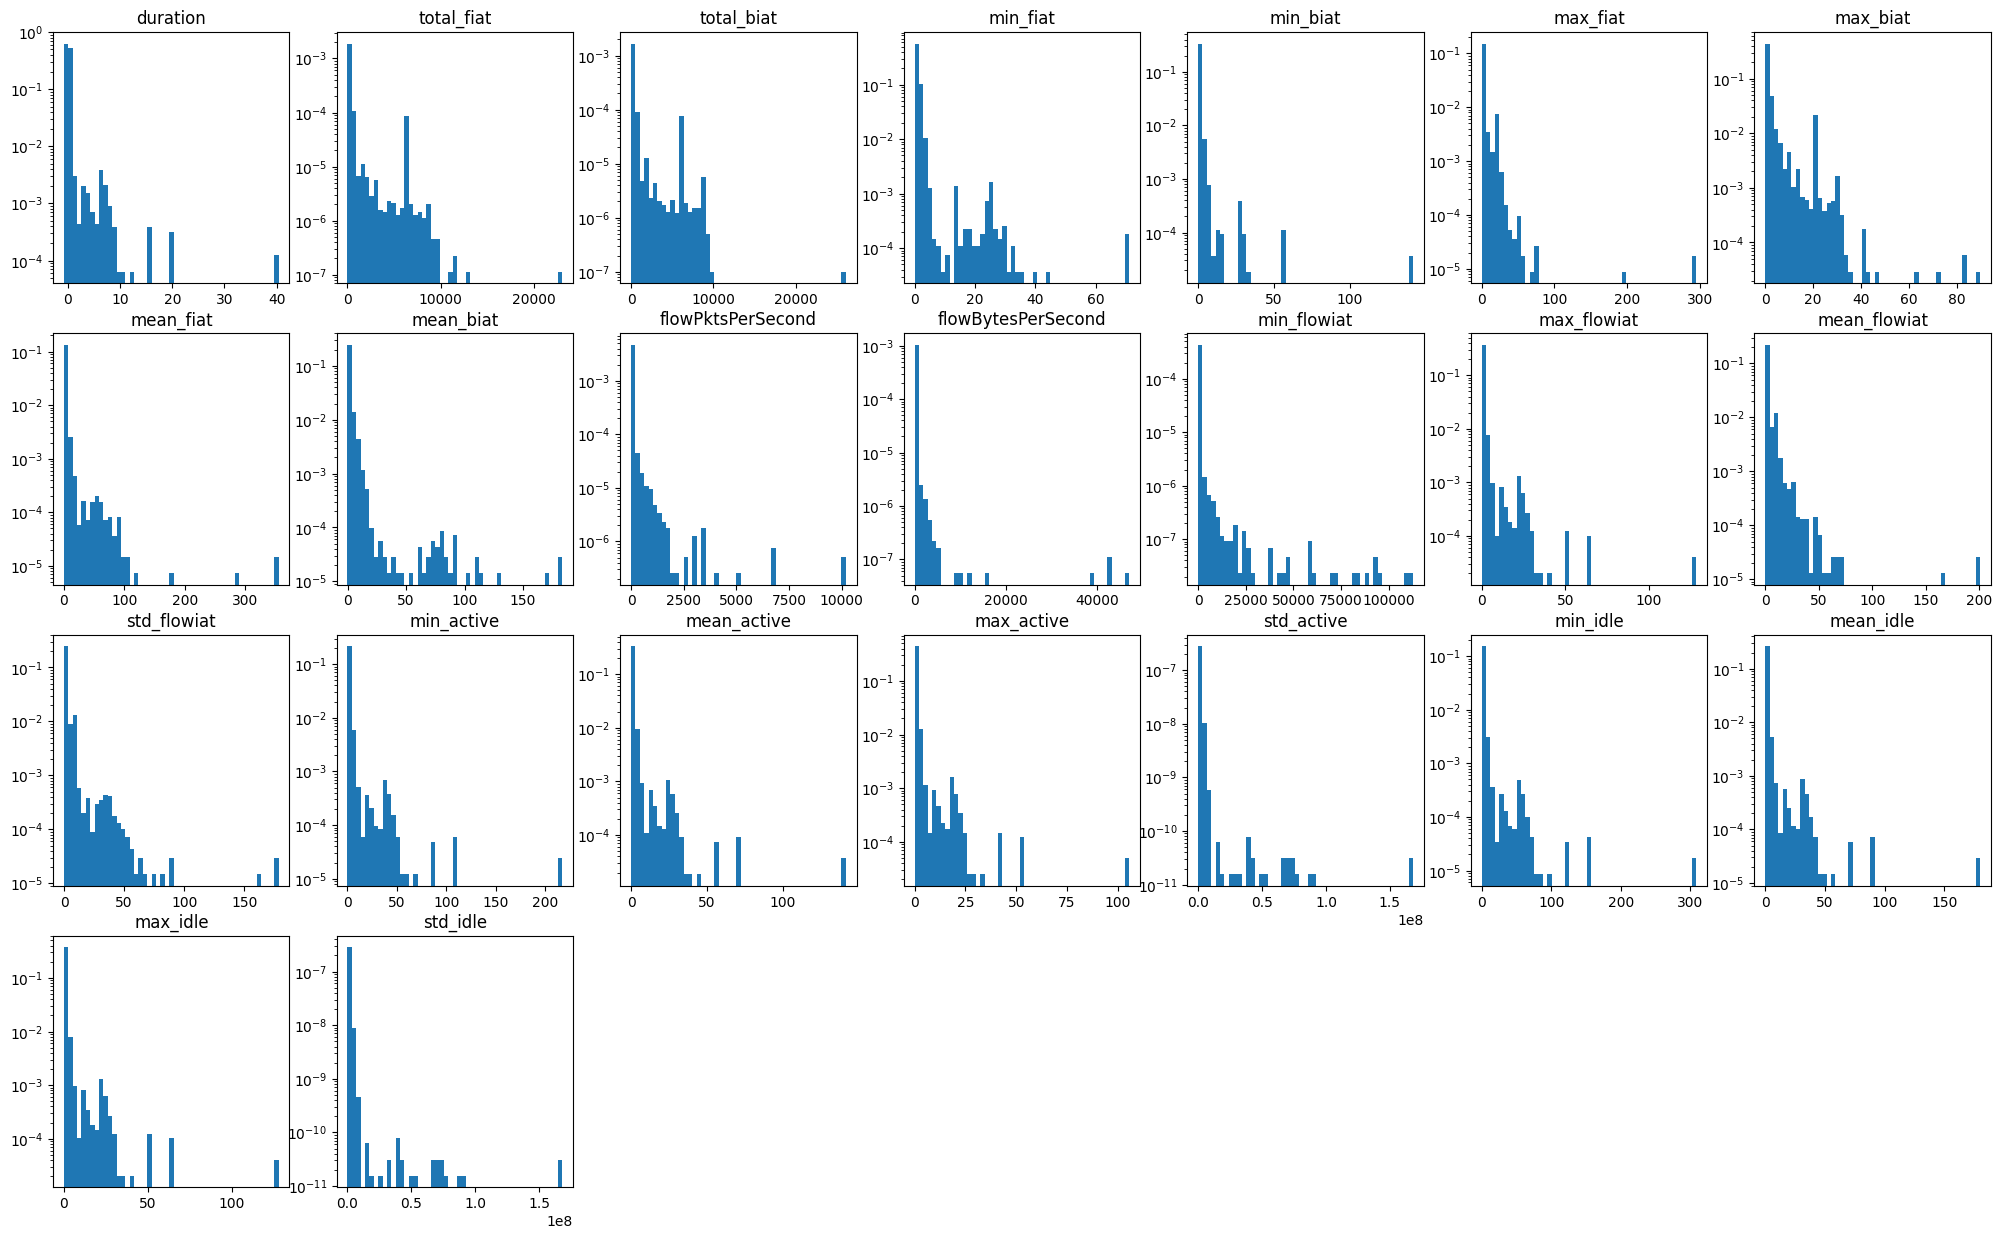

In [8]:
visualize_space(iscx_features_df)

In [9]:
import time
from contextlib import contextmanager

@contextmanager
def timeit(action="Timing"):
    # Record start time
    print(f"{action} started...")
    start_time = time.time()
    
    # Execute task
    yield
    
    # Compute and show elapsed time
    elapsed_time = time.time()-start_time
    print(f"{action} completed. Elapsed time: {elapsed_time:.2f}s")

# Test timing function by sleeping for 1 second
with timeit("Testing timing function"):
    time.sleep(1)

Testing timing function started...
Testing timing function completed. Elapsed time: 1.00s


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, name, feat, y):
    pred = model.predict(feat)
    
    print(classification_report(y, pred))
    print(confusion_matrix(y, pred), "\n")

In [11]:
from sklearn.model_selection import train_test_split

# Get feature and label values from original dataset
iscx_features = iscx_features_df.values
iscx_y = iscx_tbf["class1"].values

iscx_feat_train, iscx_feat_test, iscx_y_train, iscx_y_test = train_test_split(
    iscx_features, iscx_y, test_size=0.25, random_state=0
)

In [12]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

with timeit("Training LinearSVC"):
    linearsvc_model = LinearSVC(max_iter=10000).fit(iscx_feat_train, iscx_y_train)
with timeit("Training LogisticRegression"):
    lr_model = LogisticRegression(max_iter=10000).fit(iscx_feat_train, iscx_y_train)



Training LinearSVC started...


/usr/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training LinearSVC completed. Elapsed time: 44.65s
Training LogisticRegression started...
Training LogisticRegression completed. Elapsed time: 15.32s


In [13]:
evaluate_model(linearsvc_model, "LinearSVC classifier", iscx_feat_test, iscx_y_test)
evaluate_model(lr_model, "LogisticRegression classifier", iscx_feat_test, iscx_y_test)

              precision    recall  f1-score   support

    BROWSING       0.55      0.59      0.57      1284
        CHAT       0.16      0.39      0.22       512
          FT       0.33      0.43      0.37       696
        MAIL       0.59      0.23      0.33       191
         P2P       0.45      0.16      0.24       501
   STREAMING       0.79      0.12      0.21       245
        VOIP       0.97      0.64      0.78      1261

    accuracy                           0.47      4690
   macro avg       0.55      0.37      0.39      4690
weighted avg       0.59      0.47      0.49      4690

[[756 412  94   0  18   2   2]
 [121 199 183   9   0   0   0]
 [163 147 300  20  52   4  10]
 [ 91  12  43  44   0   0   1]
 [158  47 213   0  82   0   1]
 [ 70  26  79   1  32  30   7]
 [ 15 420  11   0   0   2 813]] 

              precision    recall  f1-score   support

    BROWSING       0.48      0.61      0.54      1284
        CHAT       0.38      0.02      0.04       512
          FT       0

In [14]:
import os
from sklearn.ensemble import RandomForestClassifier

# Number of CPUs for ensemble learning methods
N_ENSEMBLE_CPUS = max(os.cpu_count()//2, 1)

with timeit("Training RF 40"):
    rf_40_model = RandomForestClassifier(n_estimators = 40, n_jobs = N_ENSEMBLE_CPUS)
    rf_40_model = rf_40_model.fit(iscx_feat_train, iscx_y_train)
    


Training RF 40 started...
Training RF 40 completed. Elapsed time: 0.17s


In [15]:
evaluate_model(rf_40_model, "Random forest classifier (40 DTs)", iscx_feat_test, iscx_y_test)

              precision    recall  f1-score   support

    BROWSING       0.90      0.94      0.92      1284
        CHAT       0.77      0.70      0.73       512
          FT       0.85      0.78      0.81       696
        MAIL       0.79      0.80      0.79       191
         P2P       0.82      0.92      0.87       501
   STREAMING       0.89      0.87      0.88       245
        VOIP       1.00      0.98      0.99      1261

    accuracy                           0.89      4690
   macro avg       0.86      0.86      0.86      4690
weighted avg       0.89      0.89      0.89      4690

[[1213   31   22    2    6   10    0]
 [  79  357   35   18   20    1    2]
 [  36   46  540   16   52    4    2]
 [   4   15   16  152    3    1    0]
 [   7   10   11    2  462    9    0]
 [   9    3    7    1   12  213    0]
 [   5    1    6    2    7    0 1240]] 



In [16]:
with timeit("Training RF 200"):
    rf_200_model = RandomForestClassifier(n_estimators = 200, n_jobs = N_ENSEMBLE_CPUS)
    rf_200_model = rf_200_model.fit(iscx_feat_train, iscx_y_train)


Training RF 200 started...
Training RF 200 completed. Elapsed time: 0.68s


In [17]:
evaluate_model(rf_200_model, "Random forest classifier (200 DTs)", iscx_feat_test, iscx_y_test)

              precision    recall  f1-score   support

    BROWSING       0.89      0.94      0.92      1284
        CHAT       0.78      0.70      0.74       512
          FT       0.86      0.78      0.82       696
        MAIL       0.79      0.83      0.81       191
         P2P       0.83      0.93      0.87       501
   STREAMING       0.89      0.87      0.88       245
        VOIP       1.00      0.99      0.99      1261

    accuracy                           0.89      4690
   macro avg       0.86      0.86      0.86      4690
weighted avg       0.89      0.89      0.89      4690

[[1213   35   20    2    7    7    0]
 [  83  356   31   19   19    2    2]
 [  36   40  544   16   50    7    3]
 [   5   10   15  158    2    1    0]
 [   8    9    8    1  465   10    0]
 [  10    3    6    1   12  213    0]
 [   2    1    6    2    7    0 1243]] 



In [18]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# SMOTE over-sampling
smote = SMOTE(random_state=15972976)
# Borderline SMOTE over-sampling
borderline_smote = BorderlineSMOTE(random_state=15972976)

In [19]:
from imblearn.pipeline import Pipeline

with timeit("Training RF 200 with SMOTE"):
    rf_smote = Pipeline([
        ("SMOTE", smote),
        ("RF", RandomForestClassifier(n_estimators = 200, n_jobs = N_ENSEMBLE_CPUS))
    ]).fit(iscx_feat_train, iscx_y_train)

Training RF 200 with SMOTE started...
Training RF 200 with SMOTE completed. Elapsed time: 1.54s


In [20]:
evaluate_model(rf_smote, "Random forest (200 DTs) + SMOTE", iscx_feat_test, iscx_y_test)

              precision    recall  f1-score   support

    BROWSING       0.92      0.89      0.90      1284
        CHAT       0.70      0.73      0.72       512
          FT       0.85      0.77      0.81       696
        MAIL       0.79      0.84      0.82       191
         P2P       0.83      0.93      0.87       501
   STREAMING       0.82      0.88      0.85       245
        VOIP       1.00      0.99      0.99      1261

    accuracy                           0.88      4690
   macro avg       0.84      0.86      0.85      4690
weighted avg       0.88      0.88      0.88      4690

[[1148   76   30    1    7   22    0]
 [  60  374   34   18   21    3    2]
 [  30   51  533   20   50    9    3]
 [   3   15    9  161    2    1    0]
 [   4   10    8    1  464   14    0]
 [   8    3    7    1   10  216    0]
 [   1    3    5    2    7    0 1243]] 



In [21]:
with timeit("Training RF 200 with SMOTE"):
    rf_bl_smote = Pipeline([
        ("Borderline SMOTE", borderline_smote),
        ("RF", RandomForestClassifier(n_estimators = 200, n_jobs = N_ENSEMBLE_CPUS))
    ]).fit(iscx_feat_train, iscx_y_train)

Training RF 200 with SMOTE started...
Training RF 200 with SMOTE completed. Elapsed time: 1.97s


In [22]:
evaluate_model(rf_bl_smote, "Random forest (200 DTs) + blSMOTE", iscx_feat_test, iscx_y_test)

              precision    recall  f1-score   support

    BROWSING       0.92      0.89      0.90      1284
        CHAT       0.70      0.74      0.72       512
          FT       0.85      0.75      0.80       696
        MAIL       0.77      0.84      0.80       191
         P2P       0.82      0.93      0.87       501
   STREAMING       0.84      0.89      0.86       245
        VOIP       1.00      0.99      0.99      1261

    accuracy                           0.88      4690
   macro avg       0.84      0.86      0.85      4690
weighted avg       0.88      0.88      0.88      4690

[[1144   81   29    2    9   19    0]
 [  56  378   34   18   21    3    2]
 [  31   51  525   24   54    9    2]
 [   4   15    9  161    2    0    0]
 [   4   10    9    2  466   10    0]
 [   7    3    6    1   11  217    0]
 [   3    1    5    2    7    0 1243]] 



In [23]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

with timeit("Training AdaBoost"):
    adaboost_model = AdaBoostClassifier(n_estimators=200).fit(iscx_feat_train, iscx_y_train)
with timeit("Training Gradient Boost"):
    gb_model = GradientBoostingClassifier(n_estimators = 200).fit(iscx_feat_train, iscx_y_train)



Training AdaBoost started...
Training AdaBoost completed. Elapsed time: 6.26s
Training Gradient Boost started...
Training Gradient Boost completed. Elapsed time: 70.15s


In [24]:
# Evaluate boosting models
evaluate_model(adaboost_model, "AdaBoost classifier", iscx_feat_test, iscx_y_test)
evaluate_model(gb_model, "gradient boosting classifier", iscx_feat_test, iscx_y_test)

              precision    recall  f1-score   support

    BROWSING       0.68      0.83      0.75      1284
        CHAT       0.60      0.31      0.41       512
          FT       0.30      0.40      0.35       696
        MAIL       0.67      0.47      0.55       191
         P2P       0.46      0.53      0.49       501
   STREAMING       0.43      0.21      0.28       245
        VOIP       0.79      0.70      0.74      1261

    accuracy                           0.59      4690
   macro avg       0.56      0.49      0.51      4690
weighted avg       0.61      0.59      0.59      4690

[[1064   31   88    5   63   18   15]
 [ 138  157   90    8   57    4   58]
 [ 135   53  281   26  123   22   56]
 [   9   11   31   89   37    3   11]
 [  63    7   59    2  265   21   84]
 [ 144    1   21    0   19   51    9]
 [   8    2  355    2   14    0  880]] 

              precision    recall  f1-score   support

    BROWSING       0.88      0.93      0.91      1284
        CHAT       0.75  

In [25]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

with timeit("Training stacking ensemble"):
    # Create a stacking ensemble with a logistic regression meta-classifier and three sub-classifiers
    stacking_ensemble = StackingClassifier([
        ("Random forest", RandomForestClassifier(n_estimators=200)),
        ("Logistic", LogisticRegression(max_iter=10000)),
        #("SVM", LinearSVC(max_iter=10000))
    ], LogisticRegression(max_iter=10000), n_jobs=N_ENSEMBLE_CPUS)
    # Train the stacking ensemble
    stacking_ensemble.fit(iscx_feat_train, iscx_y_train)



Training stacking ensemble started...
Training stacking ensemble completed. Elapsed time: 63.13s


In [26]:
# Evaluate the stacking ensemble
evaluate_model(stacking_ensemble, "stacking ensemble", iscx_feat_test, iscx_y_test)

              precision    recall  f1-score   support

    BROWSING       0.91      0.94      0.92      1284
        CHAT       0.77      0.70      0.73       512
          FT       0.82      0.79      0.81       696
        MAIL       0.81      0.78      0.79       191
         P2P       0.83      0.92      0.87       501
   STREAMING       0.89      0.87      0.88       245
        VOIP       1.00      0.98      0.99      1261

    accuracy                           0.89      4690
   macro avg       0.86      0.86      0.86      4690
weighted avg       0.89      0.89      0.89      4690

[[1203   37   27    1    6   10    0]
 [  72  359   41   18   19    1    2]
 [  33   41  549   13   51    6    3]
 [   4   12   23  149    2    1    0]
 [   6    9   13    1  463    9    0]
 [   9    4    5    1   12  214    0]
 [   2    3    8    1    7    0 1240]] 



# Try dimension reduction

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_samples(
        samples, labels,
        title="Samples visualization",
        colors=["green", "orange", "red", "blue", "yellow", "magenta", "purple"],
        dimensions=""
    ):
    """ Visualize first three dimensions of samples. """
    if dimensions == "fiat":
        cols = [3, 5, 1]
    elif dimensions == "biat":
        cols = [4, 6, 2]
    elif dimensions == "flowiat":
        cols = [11, 12, 14]
    elif dimensions == "active":
        cols = [15, 17, 18]
    elif dimensions == "other":
        cols = [15, 17, 18]
    else:
        cols = [0, 1, 2]
    # Convert colors to NumPy array
    colors = np.array(colors)
    # Create figure
    fig = plt.figure(figsize=(20, 5))
    
    # Plot first two dimensions on a 2D plot
    ax_2d = fig.add_subplot(1, 2, 2)
    ax_2d.set_title(f"{title} [2D]")
    ax_2d.scatter(samples[:, cols[0]], samples[:, cols[1]], c=colors[labels])
    
    # Plot first three dimensions on a 3D plot
    ax_3d = fig.add_subplot(1, 2, 1, projection="3d")
    ax_3d.set_title(f"{title} [3D]")
    ax_3d.scatter(samples[:, cols[0]], samples[:, cols[1]], samples[:, cols[2]], c=colors[labels])


In [28]:
from sklearn.manifold import TSNE

perplexities = [100, 200, 400]
iscx_features_t_sne = []

for i, p in enumerate(perplexities):
    t_sne = TSNE(n_components=3, perplexity=p, init="pca", random_state=314159265)
    with timeit(f"t-SNE (Perplexity = {p})"):
        iscx_features_t_sne.append(t_sne.fit_transform(iscx_features))


t-SNE (Perplexity = 100) started...
t-SNE (Perplexity = 100) completed. Elapsed time: 60.11s
t-SNE (Perplexity = 200) started...
t-SNE (Perplexity = 200) completed. Elapsed time: 81.54s
t-SNE (Perplexity = 400) started...
t-SNE (Perplexity = 400) completed. Elapsed time: 140.37s


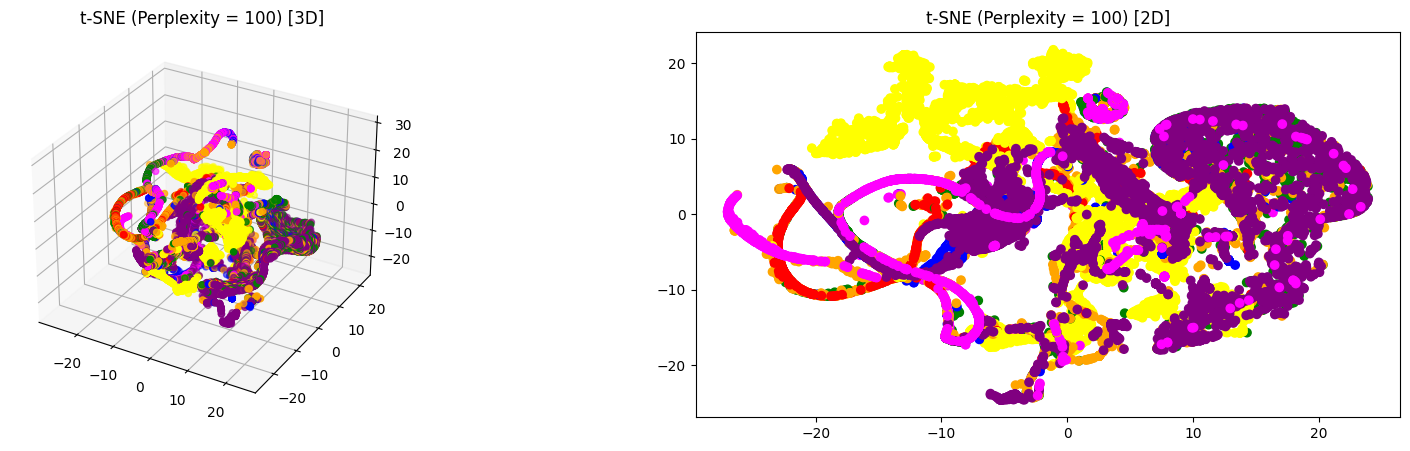

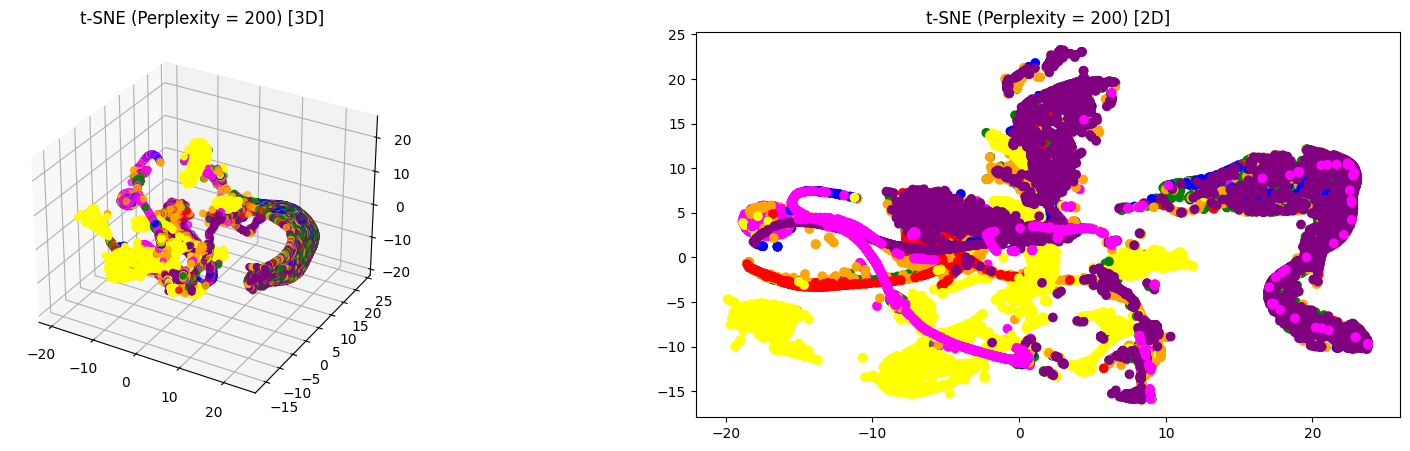

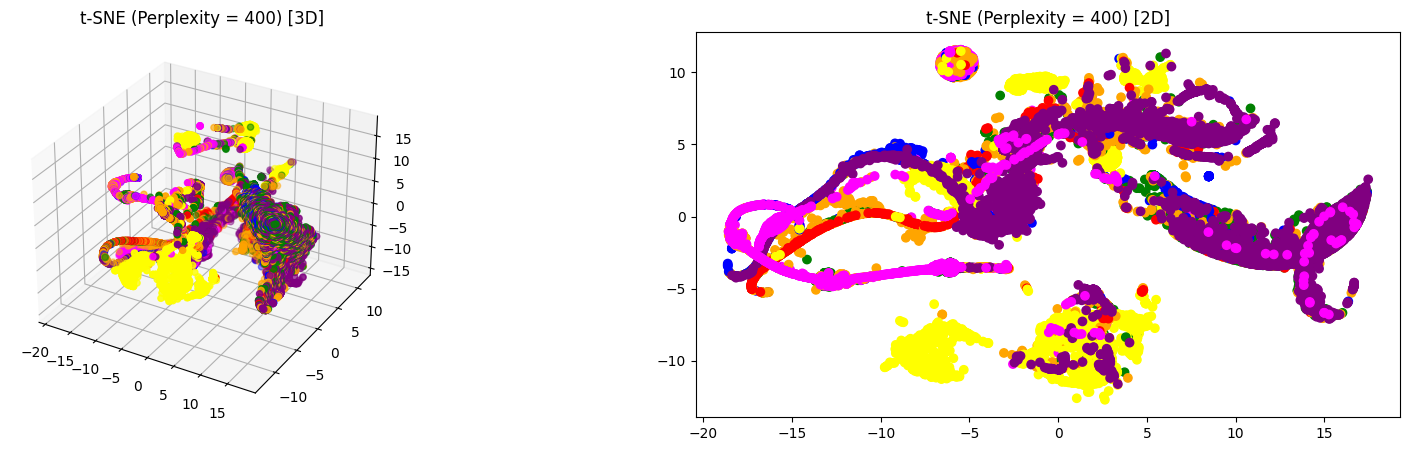

In [29]:
# Plot t-SNE result
labels = list(iscx_tbf["class1"].unique())
iscx_y_indexes = iscx_tbf["class1"].apply(lambda l: int(labels.index(l)))
for i, p in enumerate(perplexities):
    visualize_samples(iscx_features_t_sne[i], iscx_y_indexes, title=f"t-SNE (Perplexity = {p})")


In [30]:
tsne_feat_train, tsne_feat_test, tsne_y_train, tsne_y_test = train_test_split(
    iscx_features_t_sne[2], iscx_y_indexes, test_size=0.25, random_state=0
)

In [31]:
with timeit(f"Training RF 40 tsne 400"):
    m = RandomForestClassifier(n_estimators = 40, n_jobs = N_ENSEMBLE_CPUS)
    rf_40_tsne_400_model = m.fit(tsne_feat_train, tsne_y_train)


Training RF 40 tsne 400 started...
Training RF 40 tsne 400 completed. Elapsed time: 0.09s


In [32]:
evaluate_model(rf_40_tsne_400_model, "Random forest classifier (40 DTs) TSNE 400", tsne_feat_test, tsne_y_test)

              precision    recall  f1-score   support

           0       0.48      0.47      0.48       512
           1       0.61      0.58      0.59       696
           2       0.70      0.60      0.65       191
           3       0.65      0.65      0.65       245
           4       0.97      0.97      0.97      1261
           5       0.72      0.70      0.71       501
           6       0.74      0.78      0.76      1284

    accuracy                           0.75      4690
   macro avg       0.70      0.68      0.69      4690
weighted avg       0.75      0.75      0.75      4690

[[ 242   59   12   13    9   30  147]
 [  64  406   24   17   10   66  109]
 [  11   34  115    0    2    3   26]
 [  25   17    0  160    1   12   30]
 [   4    7    2    0 1228    7   13]
 [  24   65    3   21    6  350   32]
 [ 132   83    8   34    8   16 1003]] 



In [33]:
from sklearn.svm import LinearSVC

with timeit("Training LinearSVC"):
    linearsvc_model = LinearSVC(max_iter=12000).fit(tsne_feat_train, tsne_y_train)


Training LinearSVC started...
Training LinearSVC completed. Elapsed time: 20.52s


/usr/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
evaluate_model(linearsvc_model, "LinearSVC classifier", tsne_feat_test, tsne_y_test)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.78      0.07      0.14       696
           2       0.00      0.00      0.00       191
           3       0.00      0.00      0.00       245
           4       0.51      0.84      0.64      1261
           5       0.33      0.31      0.32       501
           6       0.50      0.81      0.62      1284

    accuracy                           0.49      4690
   macro avg       0.30      0.29      0.24      4690
weighted avg       0.42      0.49      0.39      4690

[[   0    5    0    0  244   27  236]
 [   0   52    0    0  251  126  267]
 [   0    7    0    0   20   60  104]
 [   0    1    0    0   78   60  106]
 [   0    1    0    0 1055    5  200]
 [   0    1    0    0  203  156  141]
 [   0    0    0    0  200   42 1042]] 



/usr/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.linear_model import LogisticRegression

with timeit("Training LogisticRegression"):
    lr_model = LogisticRegression(max_iter=20000).fit(tsne_feat_train, tsne_y_train)

Training LogisticRegression started...
Training LogisticRegression completed. Elapsed time: 0.12s


In [36]:
# Evaluate boosting models
evaluate_model(lr_model, "LogisticRegression classifier", tsne_feat_test, tsne_y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.37      0.12      0.19       696
           2       0.00      0.00      0.00       191
           3       0.00      0.00      0.00       245
           4       0.54      0.84      0.66      1261
           5       0.41      0.49      0.44       501
           6       0.53      0.79      0.64      1284

    accuracy                           0.51      4690
   macro avg       0.26      0.32      0.27      4690
weighted avg       0.39      0.51      0.43      4690

[[   0   15    0    0  246   31  220]
 [   0   87    0    0  209  163  237]
 [   0   21    0    0   17   59   94]
 [   0   50    0    0   72   58   65]
 [   0    2    0    0 1054    6  199]
 [   0   32    0    0  148  244   77]
 [   0   30    0    0  204   35 1015]] 



/usr/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
